In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

# evaluation
from sklearn.metrics import classification_report, confusion_matrix

# pipeline
from sklearn.pipeline import Pipeline

### 1) Understanding and making the data ready for preprocessing

In [2]:
# Loading Dataset
df = pd.read_csv("./data/amazonReview/test.csv")
#df = pd.read_csv("./data/amazonReview/train.csv")

# Resizing the dataset, for faster computing time. A random sample from the dataset https://stackoverflow.com/questions/40986230/reduce-dataframe-size-in-pandas
df = df.sample(frac=0.1) # Get 10% of the data

In [3]:
# Getting a quick overview of the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 7819 to 91003
Data columns (total 3 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                     

,2,Great CD,"My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I'm in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life's hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing ""Who was that singing ?"""
7819,2,Fantastic,This foot bath is amazing. The jets are powerf...
286937,1,It didn't work,We purchased this mobile after our whoozit mob...
252099,1,Missing music,I loved the music in the movie and was disappo...
280783,2,old dogs,awesome move. this movie a lot like wild hogs ...
264559,2,"A little bit out there, but worth reading",Amy has a visit from Andy in the middle of the...


In [4]:
# Renaming columns. Inspiration from Method three: https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/
df.set_axis(['polarity', 'title', 'text'], axis='columns', inplace=True)
df.head()

,polarity,title,text
7819,2,Fantastic,This foot bath is amazing. The jets are powerf...
286937,1,It didn't work,We purchased this mobile after our whoozit mob...
252099,1,Missing music,I loved the music in the movie and was disappo...
280783,2,old dogs,awesome move. this movie a lot like wild hogs ...
264559,2,"A little bit out there, but worth reading",Amy has a visit from Andy in the middle of the...


In [5]:
#Assigning the text column to X and the emotions to y. https://medium.com/codex/how-to-set-x-and-y-in-pandas-3f38584e9bed
y_col = 'polarity'
y = df[y_col]
X = df[df.columns.drop(y_col)]
X.head()

,title,text
7819,Fantastic,This foot bath is amazing. The jets are powerf...
286937,It didn't work,We purchased this mobile after our whoozit mob...
252099,Missing music,I loved the music in the movie and was disappo...
280783,old dogs,awesome move. this movie a lot like wild hogs ...
264559,"A little bit out there, but worth reading",Amy has a visit from Andy in the middle of the...


In [6]:
y.head()

7819      2
286937    1
252099    1
280783    2
264559    2
Name: polarity, dtype: int64

### 2) Preprocessing

In [7]:
# Checking the integrity of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 7819 to 91003
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   polarity  40000 non-null  int64 
 1   title     40000 non-null  object
 2   text      40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [8]:
# Drop any rows that have missing values
df = df.dropna()

# Checking the result
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 7819 to 91003
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   polarity  40000 non-null  int64 
 1   title     40000 non-null  object
 2   text      40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [9]:
# Train test splitting the data. Naming them pre to store them for later models.
X_trainPre, X_testPre, y_trainPre, y_testPre = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
X_testPre

,title,text
315981,Horrible Movie,"I only rate this movie with one star, because ..."
251865,Lengthy and slow,I found this book to be a disappointment. It w...
213095,Tropical Architecture in a Nut Shell,Cleveland Salmon has thought of everything! Wh...
242771,great gun,this gun is a great gun;. i have had it for 7 ...
341926,sweet pea,Scotter showed up on time. Was like they said....
...,...,...
355362,watch her smile,exactly the watch she'll want. dress it up or ...
57972,Beautiful writing,"Like the writers he has been compared to, Mr F..."
277386,Bob Acri is awesome,I regret that I am only just now discovering t...
67451,HOOKED!,I immediately became hooked on this book. Ever...


In [16]:
# Using the count vectorizer https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/
vectorizer = CountVectorizer(max_df=0.1, stop_words=["title", "text"])
 
#Fitting on the X_train data
vectorizer.fit(X_trainPre['text'])

# Printing the identified Unique words along with their indices
print("Vocabulary: ", vectorizer.vocabulary_)
 

#Transforming both the training and test data
X_train = vectorizer.transform(X_trainPre)
X_test = vectorizer.transform(X_testPre)
 
# Summarizing the Encoded Texts
#print("Encoded Document is:")
#print(X_train.toarray())

Vocabulary:  {'changed': 9144, 'life': 29013, 'use': 52768, 'many': 30524, 'depressing': 13912, 'negative': 33537, 'thoughts': 50016, 'always': 2971, 'waiting': 53830, 'bottom': 7007, 'fall': 18601, 'did': 14390, 'began': 5697, 'reading': 40189, '2006': 528, 'transformed': 50972, 'older': 34788, 'principals': 38634, 'work': 55123, 'today': 50432, 'enjoy': 17192, 'apply': 3711, 'must': 33088, 'buy': 7965, 'seeing': 43887, 'hoped': 24077, 'trading': 50860, 'view': 53354, 'market': 30639, 'maker': 30275, 'disappointment': 14713, 'could': 11955, 'written': 55317, 'anyone': 3550, 'books': 6846, 'nothing': 34188, 'special': 46414, 'contribution': 11562, 'course': 12032, 'understandable': 52021, 'why': 54626, 'reveal': 41707, 'secret': 43823, 'how': 24248, 'make': 30269, 'money': 32386, 'beat': 5547, 'traders': 50855, 'public': 39213, 'profession': 38803, 'then': 49745, 'misleading': 32035, 'since': 45110, 'writing': 55313, 'any': 3536, 'author': 4600, 'sometimes': 46044, 'movie': 32770, 'mis

In [17]:
X_train.shape

(2, 56064)

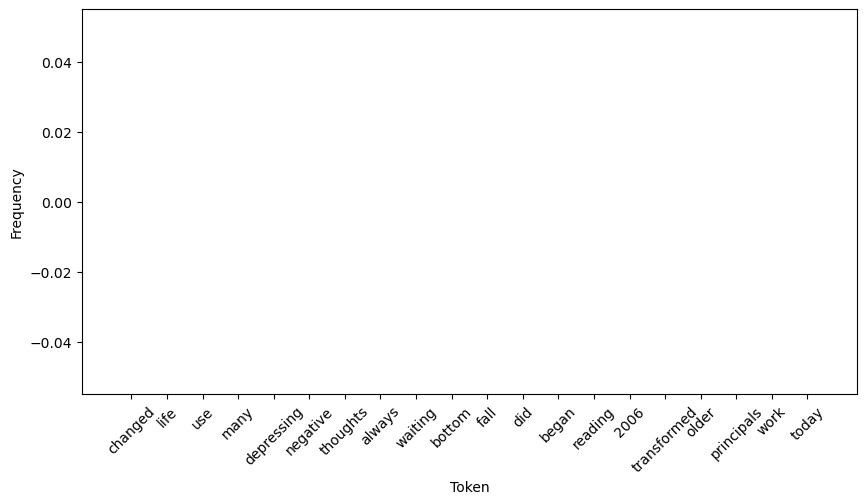

In [18]:
# Displaying the data to get a better understanding. Code taken from LAB4
def top_n_tokens(X, cv, N, plot=True):
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    top_words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)[:N]

    if plot:
        plt.figure(figsize=(10, 5))
        plt.bar([w[0] for w in top_words_freq], [w[1] for w in top_words_freq])
        plt.xticks(rotation=45)
        plt.xlabel('Token')
        plt.ylabel('Frequency')
        plt.show()
    else:
        return top_words_freq
    
top_n_tokens(
    X= X_train, 
    cv= vectorizer, 
    N=20
)